In [62]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GRU, Bidirectional, Conv1D, MaxPooling1D, RNN
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras import regularizers
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
data = pd.read_csv('/Users/inigoparra/Desktop/carpeta sin título/clean-master.csv')

In [50]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']
X_val = val_data['text']
y_val = val_data['label']

In [51]:
with open('/Users/inigoparra/Desktop/GitHub Repositories/WiBaSets/stopwords.txt', 'r') as f:
    stopwords = set(f.read().splitlines())

def preprocess_text(text):
    if not isinstance(text, str):
        text = str(text)
        
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    return ' '.join(filtered_tokens)

X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)
X_val = X_val.apply(preprocess_text)

print(X_train[0])

lan nabarmendu eduki bakea demokrazia euskal gizartearen ondozatea lortzeko


In [52]:
import re
import nltk
from nltk.corpus import stopwords

def clean_text(text):

    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)  
    text = re.sub(r'[0-9]', '', text)  
    text = re.sub(r'[^\w\s]', '', text)

    stop_words = set(stopwords.words('basque'))
    
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]

    text = ' '.join(tokens)
    return text

X_train = X_train.apply(clean_text)
X_test = X_test.apply(clean_text)
X_val = X_val.apply(clean_text)

print(X_train[6])

ondarrutar arrazoi bozkatu


In [53]:
max_features = 20500
max_len = 100
embedding_dim = 300

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_val_seq = tokenizer.texts_to_sequences(X_val)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len)

In [99]:
model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=max_len))
model.add(LSTM(16, return_sequences=True,
               kernel_regularizer=regularizers.l2(0.02), 
               recurrent_regularizer=regularizers.l2(0.02)))
model.add(Dropout(0.6))
model.add(GRU(8))
model.add(Dropout(0.6))
model.add(Dense(3, activation='softmax'))

optimizer = Adam()
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [100]:
batch_size = 8
epochs = 100
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[early_stopping]
)

Epoch 1/100
672/672 [==============================] - 34s 48ms/step - loss: 1.2592 - accuracy: 0.3589 - val_loss: 1.0946 - val_accuracy: 0.3527
Epoch 2/100
672/672 [==============================] - 31s 47ms/step - loss: 1.0932 - accuracy: 0.3704 - val_loss: 1.0937 - val_accuracy: 0.3832
Epoch 3/100
672/672 [==============================] - 32s 47ms/step - loss: 1.0356 - accuracy: 0.4940 - val_loss: 1.1182 - val_accuracy: 0.4129
Epoch 4/100
672/672 [==============================] - 32s 47ms/step - loss: 0.7782 - accuracy: 0.6893 - val_loss: 1.3794 - val_accuracy: 0.3929
Epoch 5/100
672/672 [==============================] - 32s 48ms/step - loss: 0.5905 - accuracy: 0.7827 - val_loss: 1.5737 - val_accuracy: 0.3720
Epoch 6/100
672/672 [==============================] - 32s 48ms/step - loss: 0.4698 - accuracy: 0.8441 - val_loss: 1.7389 - val_accuracy: 0.3780
Epoch 7/100
672/672 [==============================] - 32s 48ms/step - loss: 0.4051 - accuracy: 0.8579 - val_loss: 1.9500 - val_ac

In [101]:
y_predict = model.predict(X_val_pad)
y_predict_classes = np.argmax(y_predict, axis=1)
print(classification_report(y_val, y_predict_classes, digits=3))

42/42 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       377
           1      0.387     0.316     0.348       493
           2      0.382     0.757     0.507       474

    accuracy                          0.383      1344
   macro avg      0.256     0.358     0.285      1344
weighted avg      0.277     0.383     0.307      1344



/Users/inigoparra/opt/anaconda3/envs/TF/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/inigoparra/opt/anaconda3/envs/TF/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/inigoparra/opt/anaconda3/envs/TF/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [102]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

53/53 [==============================] - 1s 9ms/step - loss: 1.0922 - accuracy: 0.4006
Test loss: 1.0921796560287476, Test accuracy: 0.4005952477455139


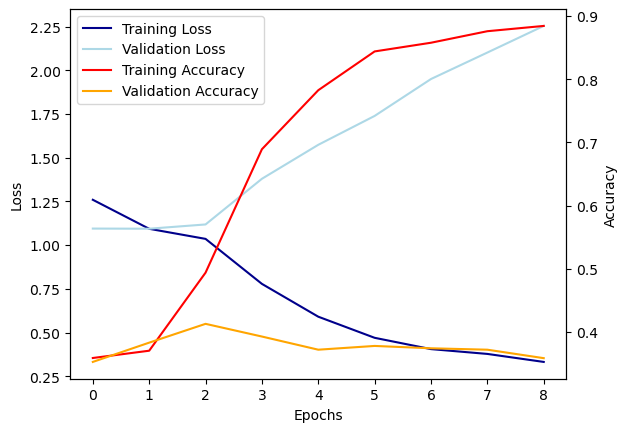

In [103]:
import matplotlib.pyplot as plt

# Get the training and validation metrics from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation loss curves
plt.plot(train_loss, label='Training Loss', color='darkblue')
plt.plot(val_loss, label='Validation Loss', color='lightblue')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Plot the training and validation accuracy curves
plt.twinx()  # Create a second y-axis that shares the same x-axis
plt.plot(train_acc, label='Training Accuracy', color='red')
plt.plot(val_acc, label='Validation Accuracy', color='orange')
plt.ylabel('Accuracy')

handles, labels = [], []
for ax in plt.gcf().axes:
    for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
plt.legend(handles, labels)

plt.show()
